In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from pprint import pprint
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from math import radians, cos, sin, asin, sqrt

pd.set_option("display.max_columns", None)
import copy

In [ ]:
atlaaa=pd.read_csv('Datasets/arrival/ATL_AA_A.csv')
atldla=pd.read_csv('Datasets/arrival/ATL_DL_A.csv')
atlooa=pd.read_csv('Datasets/arrival/ATL_OO_A.csv')
atluaa=pd.read_csv('Datasets/arrival/ATL_UA_A.csv')
atlwna=pd.read_csv('Datasets/arrival/ATL_WN_A.csv')
dfwaaa=pd.read_csv('Datasets/arrival/DFW_AA_A.csv')
dfwdla=pd.read_csv('Datasets/arrival/DFW_DL_A.csv')
dfwooa=pd.read_csv('Datasets/arrival/DFW_OO_A.csv')
dfwuaa=pd.read_csv('Datasets/arrival/DFW_UA_A.csv')
laxaaa=pd.read_csv('Datasets/arrival/LAX_AA_A.csv')
laxdla=pd.read_csv('Datasets/arrival/LAX_DL_A.csv')
laxooa=pd.read_csv('Datasets/arrival/LAX_OO_A.csv')
laxuaa=pd.read_csv('Datasets/arrival/LAX_UA_A.csv')
laxwna=pd.read_csv('Datasets/arrival/LAX_WN_A.csv')
ordaaa=pd.read_csv('Datasets/arrival/ORD_AA_A.csv')
orduaa=pd.read_csv('Datasets/arrival/ORD_UA_A.csv')
ordooa=pd.read_csv('Datasets/arrival/ORD_OO_A.csv')
orddla=pd.read_csv('Datasets/arrival/ORD_DL_A.csv')
#run this cell if working on colab

In [ ]:
atla = pd.concat([atlaaa, atldla,atlooa,atluaa,atlwna]).reset_index(drop=True)
dfwa = pd.concat([dfwaaa,dfwdla,dfwooa,dfwuaa]).reset_index(drop=True)
laxa = pd.concat([laxaaa,laxdla,laxooa,laxuaa,laxwna]).reset_index(drop=True)
orda = pd.concat([ordaaa,orduaa,ordooa,orddla]).reset_index(drop=True)

In [ ]:
atla["Destination Airport"] = "ATL"
dfwa["Destination Airport"] = "DFW"
laxa["Destination Airport"] = "LAX"
orda["Destination Airport"] = "ORD"

In [ ]:
flights = pd.concat([atla,dfwa,laxa,orda]).reset_index(drop = True)

In [ ]:
airports = pd.read_csv('Datasets/airports.csv')

In [ ]:
flights.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,AA,01/01/18,495.0,N814AW,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,0.0,0.0,0.0,0.0,0.0,ATL
1,AA,01/01/18,608.0,N742PS,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,0.0,0.0,0.0,0.0,0.0,ATL
2,AA,01/01/18,612.0,N663AW,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,0.0,0.0,0.0,0.0,0.0,ATL
3,AA,01/01/18,616.0,N658AW,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,15.0,0.0,2.0,0.0,0.0,ATL
4,AA,01/01/18,687.0,N716UW,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,0.0,0.0,0.0,0.0,0.0,ATL


In [ ]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airportsdest = pd.read_csv('Datasets/airports.csv')

In [ ]:
airportsog = pd.read_csv('Datasets/airports.csv')

In [ ]:
flights1 = pd.merge(flights, airportsdest, how = 'left', left_on = "Destination Airport", right_on="IATA_CODE" ) 

In [ ]:
flights1.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,AA,01/01/18,495.0,N814AW,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,0.0,0.0,0.0,0.0,0.0,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
1,AA,01/01/18,608.0,N742PS,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,0.0,0.0,0.0,0.0,0.0,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
2,AA,01/01/18,612.0,N663AW,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,0.0,0.0,0.0,0.0,0.0,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
3,AA,01/01/18,616.0,N658AW,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,15.0,0.0,2.0,0.0,0.0,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
4,AA,01/01/18,687.0,N716UW,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,0.0,0.0,0.0,0.0,0.0,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


In [ ]:
flights2 = flights1.rename(columns={'CITY':'destinationcity', 'AIRPORT' : 'destinationairport', 'STATE': 'destinationstate', 'LATITUDE': 'destinationlatitude', 'LONGITUDE': 'destinationlongitude'})

In [ ]:
flights2.shape

(895671, 25)

In [ ]:
flights2.drop(["IATA_CODE","destinationairport", "COUNTRY"], axis = 1, inplace = True)

In [ ]:
flights2.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude
0,AA,01/01/18,495.0,N814AW,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694
1,AA,01/01/18,608.0,N742PS,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694
2,AA,01/01/18,612.0,N663AW,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694
3,AA,01/01/18,616.0,N658AW,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,15.0,0.0,2.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694
4,AA,01/01/18,687.0,N716UW,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694


In [ ]:
flights3 = pd.merge(flights2, airportsog, how = 'left', left_on = "Origin Airport", right_on="IATA_CODE" ) 

In [ ]:
flights4 = flights3.rename(columns={'CITY':'origincity', 'STATE': 'originstate', 'LATITUDE': 'originlatitude', 'LONGITUDE': 'originlongitude'})

In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,IATA_CODE,AIRPORT,origincity,originstate,COUNTRY,originlatitude,originlongitude
0,AA,01/01/18,495.0,N814AW,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
1,AA,01/01/18,608.0,N742PS,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
2,AA,01/01/18,612.0,N663AW,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694,PHX,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
3,AA,01/01/18,616.0,N658AW,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,15.0,0.0,2.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
4,AA,01/01/18,687.0,N716UW,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,0.0,0.0,0.0,0.0,0.0,ATL,Atlanta,GA,33.64044,-84.42694,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313


In [ ]:
flights4.drop(["Flight Number", "Tail Number", "IATA_CODE", "AIRPORT", "COUNTRY", "Delay Late Aircraft Arrival (Minutes)", "Delay Security (Minutes)", "Delay National Aviation System (Minutes)", "Delay Weather (Minutes)", "Delay Carrier (Minutes)"],axis = 1, inplace = True)

In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313


In [ ]:
flights3.isnull().sum()

Carrier Code                                  18
Date (MM/DD/YYYY)                             36
Flight Number                                 36
Tail Number                                 1109
Origin Airport                                36
Scheduled Arrival Time                        36
Actual Arrival Time                           36
Scheduled Elapsed Time (Minutes)              36
Actual Elapsed Time (Minutes)                 36
Arrival Delay (Minutes)                       36
Wheels-on Time                                36
Taxi-In time (Minutes)                        36
Delay Carrier (Minutes)                       36
Delay Weather (Minutes)                       36
Delay National Aviation System (Minutes)      36
Delay Security (Minutes)                      36
Delay Late Aircraft Arrival (Minutes)         36
Destination Airport                            0
destinationcity                                0
destinationstate                               0
destinationlatitude 

In [ ]:
flights3.shape

(895671, 29)

In [ ]:
flights4.shape

(895671, 19)

In [ ]:
flights4.dropna(inplace=True)

In [ ]:
flights4['Month']=flights4['Date (MM/DD/YYYY)'].str.strip().str[0:2]
flights4['Day']=flights4['Date (MM/DD/YYYY)'].str.strip().str[3:5]
flights4['Month'] = flights4['Month'].astype('|S')
flights4['Month']=pd.to_numeric(flights4['Month'])
flights4['Day'] = flights4['Day'].astype('|S')
flights4['Day']=pd.to_numeric(flights4['Day'])

In [ ]:
flights4["Scheduled Arrival Hour"] = [int(hour[0:2]) if (len(hour)==5) else int(hour[0:1]) for hour in flights4["Scheduled Arrival Time"]]
flights4["Scheduled Arrival Minute"] = [int(mins[-2:]) for mins in flights4["Scheduled Arrival Time"]]
flights4["Actual Arrival Hour"] = [int(hour[0:2]) if (len(hour)==5) else int(hour[0:1]) for hour in flights4["Actual Arrival Time"]]
flights4["Actual Arrival Minute"] = [int(mins[-2:]) for mins in flights4["Actual Arrival Time"]]
flights4['Scheduled Arrival Hour'] = flights4['Scheduled Arrival Hour'].replace(24,0) #to replace values having 24 in the hour column with 0
flights4['Actual Arrival Hour'] = flights4["Actual Arrival Hour"].replace(24,0)

In [ ]:
flights4['Datepy']=pd.to_datetime(flights4['Date (MM/DD/YYYY)'],infer_datetime_format=True)
flights4['Weekdayname'] = flights4['Datepy'].dt.day_name()
flights4['Weekdaynum'] = flights4['Weekdayname'].replace(['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],[0,1,2,3,4,5,6])

In [ ]:
flights4.shape

(891586, 28)

In [ ]:
flights4['afloat']=flights4['Actual Arrival Hour']+flights4["Actual Arrival Minute"]/60.0
flights4['xa']=np.sin(2.*np.pi*flights4.afloat/24.)
flights4['ya']=np.cos(2.*np.pi*flights4.afloat/24.)
flights4['sfloat']=flights4['Scheduled Arrival Hour']+flights4["Scheduled Arrival Minute"]/60.0
flights4['xs']=np.sin(2.*np.pi*flights4.sfloat/24.)
flights4['ys']=np.cos(2.*np.pi*flights4.sfloat/24.)

In [ ]:
def encodedaymonth(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [ ]:
encodedaymonth(flights4, "Month" , 12)

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Actual Arrival Hour,Actual Arrival Minute,Datepy,Weekdayname,Weekdaynum,afloat,xa,ya,sfloat,xs,ys,Month_sin,Month_cos
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,10,40,2018-01-01,Monday,0,10.666667,0.342020,-0.939693,10.950000,0.271440,-0.962455,5.000000e-01,0.866025
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,19,41,2018-01-01,Monday,0,19.683333,-0.904455,0.426569,19.800000,-0.891007,0.453990,5.000000e-01,0.866025
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,18,30,2018-01-01,Monday,0,18.500000,-0.991445,0.130526,18.800000,-0.978148,0.207912,5.000000e-01,0.866025
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,17,46,2018-01-01,Monday,0,17.766667,-0.998135,-0.061049,17.483333,-0.990866,-0.134851,5.000000e-01,0.866025
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,20,58,2018-01-01,Monday,0,20.966667,-0.713250,0.700909,21.350000,-0.639439,0.768842,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895664,DL,12/31/2018,ATL,23:34,23:06,122.0,103.0,-28.0,22:58,8.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,23,34,23,6,2018-12-31,Monday,0,23.100000,-0.233445,0.972370,23.566667,-0.113203,0.993572,-2.449294e-16,1.000000
895665,DL,12/31/2018,ATL,17:59,17:48,128.0,124.0,-11.0,17:38,10.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,17,59,17,48,2018-12-31,Monday,0,17.800000,-0.998630,-0.052336,17.983333,-0.999990,-0.004363,-2.449294e-16,1.000000
895666,DL,12/31/2018,MSP,16:57,17:13,94.0,113.0,16.0,16:57,16.0,ORD,Chicago,IL,41.97960,-87.90446,Minneapolis,MN,44.88055,-93.21692,12,31,16,57,17,13,2018-12-31,Monday,0,17.216667,-0.979045,-0.203642,16.950000,-0.962455,-0.271440,-2.449294e-16,1.000000
895667,DL,12/31/2018,SEA,15:43,15:44,238.0,241.0,1.0,15:31,13.0,ORD,Chicago,IL,41.97960,-87.90446,Seattle,WA,47.44898,-122.30931,12,31,15,43,15,44,2018-12-31,Monday,0,15.733333,-0.829038,-0.559193,15.716667,-0.826590,-0.562805,-2.449294e-16,1.000000


In [ ]:
encodedaymonth(flights4,"Day",31)

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Actual Arrival Hour,Actual Arrival Minute,Datepy,Weekdayname,Weekdaynum,afloat,xa,ya,sfloat,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,10,40,2018-01-01,Monday,0,10.666667,0.342020,-0.939693,10.950000,0.271440,-0.962455,5.000000e-01,0.866025,2.012985e-01,0.97953
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,19,41,2018-01-01,Monday,0,19.683333,-0.904455,0.426569,19.800000,-0.891007,0.453990,5.000000e-01,0.866025,2.012985e-01,0.97953
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,18,30,2018-01-01,Monday,0,18.500000,-0.991445,0.130526,18.800000,-0.978148,0.207912,5.000000e-01,0.866025,2.012985e-01,0.97953
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,17,46,2018-01-01,Monday,0,17.766667,-0.998135,-0.061049,17.483333,-0.990866,-0.134851,5.000000e-01,0.866025,2.012985e-01,0.97953
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,20,58,2018-01-01,Monday,0,20.966667,-0.713250,0.700909,21.350000,-0.639439,0.768842,5.000000e-01,0.866025,2.012985e-01,0.97953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895664,DL,12/31/2018,ATL,23:34,23:06,122.0,103.0,-28.0,22:58,8.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,23,34,23,6,2018-12-31,Monday,0,23.100000,-0.233445,0.972370,23.566667,-0.113203,0.993572,-2.449294e-16,1.000000,-2.449294e-16,1.00000
895665,DL,12/31/2018,ATL,17:59,17:48,128.0,124.0,-11.0,17:38,10.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,17,59,17,48,2018-12-31,Monday,0,17.800000,-0.998630,-0.052336,17.983333,-0.999990,-0.004363,-2.449294e-16,1.000000,-2.449294e-16,1.00000
895666,DL,12/31/2018,MSP,16:57,17:13,94.0,113.0,16.0,16:57,16.0,ORD,Chicago,IL,41.97960,-87.90446,Minneapolis,MN,44.88055,-93.21692,12,31,16,57,17,13,2018-12-31,Monday,0,17.216667,-0.979045,-0.203642,16.950000,-0.962455,-0.271440,-2.449294e-16,1.000000,-2.449294e-16,1.00000
895667,DL,12/31/2018,SEA,15:43,15:44,238.0,241.0,1.0,15:31,13.0,ORD,Chicago,IL,41.97960,-87.90446,Seattle,WA,47.44898,-122.30931,12,31,15,43,15,44,2018-12-31,Monday,0,15.733333,-0.829038,-0.559193,15.716667,-0.826590,-0.562805,-2.449294e-16,1.000000,-2.449294e-16,1.00000


In [ ]:
encodedaymonth(flights4,"Weekdaynum",6)

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Actual Arrival Hour,Actual Arrival Minute,Datepy,Weekdayname,Weekdaynum,afloat,xa,ya,sfloat,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,10,40,2018-01-01,Monday,0,10.666667,0.342020,-0.939693,10.950000,0.271440,-0.962455,5.000000e-01,0.866025,2.012985e-01,0.97953,0.0,1.0
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,19,41,2018-01-01,Monday,0,19.683333,-0.904455,0.426569,19.800000,-0.891007,0.453990,5.000000e-01,0.866025,2.012985e-01,0.97953,0.0,1.0
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,18,30,2018-01-01,Monday,0,18.500000,-0.991445,0.130526,18.800000,-0.978148,0.207912,5.000000e-01,0.866025,2.012985e-01,0.97953,0.0,1.0
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,17,46,2018-01-01,Monday,0,17.766667,-0.998135,-0.061049,17.483333,-0.990866,-0.134851,5.000000e-01,0.866025,2.012985e-01,0.97953,0.0,1.0
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,20,58,2018-01-01,Monday,0,20.966667,-0.713250,0.700909,21.350000,-0.639439,0.768842,5.000000e-01,0.866025,2.012985e-01,0.97953,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895664,DL,12/31/2018,ATL,23:34,23:06,122.0,103.0,-28.0,22:58,8.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,23,34,23,6,2018-12-31,Monday,0,23.100000,-0.233445,0.972370,23.566667,-0.113203,0.993572,-2.449294e-16,1.000000,-2.449294e-16,1.00000,0.0,1.0
895665,DL,12/31/2018,ATL,17:59,17:48,128.0,124.0,-11.0,17:38,10.0,ORD,Chicago,IL,41.97960,-87.90446,Atlanta,GA,33.64044,-84.42694,12,31,17,59,17,48,2018-12-31,Monday,0,17.800000,-0.998630,-0.052336,17.983333,-0.999990,-0.004363,-2.449294e-16,1.000000,-2.449294e-16,1.00000,0.0,1.0
895666,DL,12/31/2018,MSP,16:57,17:13,94.0,113.0,16.0,16:57,16.0,ORD,Chicago,IL,41.97960,-87.90446,Minneapolis,MN,44.88055,-93.21692,12,31,16,57,17,13,2018-12-31,Monday,0,17.216667,-0.979045,-0.203642,16.950000,-0.962455,-0.271440,-2.449294e-16,1.000000,-2.449294e-16,1.00000,0.0,1.0
895667,DL,12/31/2018,SEA,15:43,15:44,238.0,241.0,1.0,15:31,13.0,ORD,Chicago,IL,41.97960,-87.90446,Seattle,WA,47.44898,-122.30931,12,31,15,43,15,44,2018-12-31,Monday,0,15.733333,-0.829038,-0.559193,15.716667,-0.826590,-0.562805,-2.449294e-16,1.000000,-2.449294e-16,1.00000,0.0,1.0


In [ ]:
flights4.drop(["Weekdayname", "Scheduled Arrival Hour", "Scheduled Arrival Minute", "Actual Arrival Hour", "Actual Arrival Minute", "Datepy", "Weekdayname", "afloat", "sfloat"], axis = 1, inplace = True)

In [ ]:
flights4.shape

(891586, 34)

In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0


In [ ]:
flights4["Departure Delay (Minutes)"] = flights4["Arrival Delay (Minutes)"] - flights4["Actual Elapsed Time (Minutes)"] + flights4["Scheduled Elapsed Time (Minutes)"]  

In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes)
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0


In [ ]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes)
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0


In [ ]:
haversine(-84.42694,33.6404, -90.94313, 35.21401)

622.60123883951

In [ ]:
flights4["HS_Dist"] = 0


In [ ]:
for i,idx in enumerate(flights4):
  flights4["HS_Dist"][i] = haversine(flights4["originlongitude"][i],flights4["originlatitude"][i],flights4["destinationlongitude"][i],flights4["destinationlatitude"][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
flights4.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate,destinationlatitude,destinationlongitude,origincity,originstate,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes),HS_Dist
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,364
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,1174
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,GA,33.64044,-84.42694,Phoenix,AZ,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0,2548
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,GA,33.64044,-84.42694,Dallas-Fort Worth,TX,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0,1174
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,GA,33.64044,-84.42694,Charlotte,NC,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0,364


In [ ]:
flights4["Delayed?"] = [1 if (delay > 0) else  0 for delay in flights4['Arrival Delay (Minutes)']] 

In [ ]:
ce_bin_deststate = ce.BinaryEncoder(cols = ["destinationstate"])
flights5 = ce_bin_deststate.fit_transform(flights4)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
ce_bin_ogstate = ce.BinaryEncoder(cols = ["originstate"])
flights5 = ce_bin_ogstate.fit_transform(flights5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
flights5.shape

(891586, 45)

In [ ]:
flights5.head(10)

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Destination Airport,destinationcity,destinationstate_0,destinationstate_1,destinationstate_2,destinationlatitude,destinationlongitude,origincity,originstate_0,originstate_1,originstate_2,originstate_3,originstate_4,originstate_5,originstate_6,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes),HS_Dist,Delayed?
0,AA,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Charlotte,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,364,0
1,AA,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Dallas-Fort Worth,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,1174,0
2,AA,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Phoenix,0,0,0,0,0,1,1,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0,2548,0
3,AA,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Dallas-Fort Worth,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0,1174,1
4,AA,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Charlotte,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0,364,0
5,AA,01/01/18,MIA,11:51,11:35,116.0,104.0,-16.0,11:29,6.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Miami,0,0,0,0,1,0,0,25.79325,-80.29056,1,1,11,51,0,0.108867,-0.994056,0.039260,-0.999229,0.5,0.866025,0.201299,0.97953,0.0,1.0,-4.0,959,0
6,AA,01/01/18,LAX,7:04,6:45,257.0,243.0,-19.0,6:32,13.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Los Angeles,0,0,0,0,1,0,1,33.94254,-118.40807,1,1,7,4,0,0.980785,-0.195090,0.961262,-0.275637,0.5,0.866025,0.201299,0.97953,0.0,1.0,-5.0,3125,0
7,AA,01/01/18,LAX,14:23,14:12,253.0,249.0,-11.0,13:59,13.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Los Angeles,0,0,0,0,1,0,1,33.94254,-118.40807,1,1,14,23,0,-0.544639,-0.838671,-0.584250,-0.811574,0.5,0.866025,0.201299,0.97953,0.0,1.0,-7.0,3125,0
8,AA,01/01/18,ORD,11:40,11:30,116.0,103.0,-10.0,11:22,8.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Chicago,0,0,0,0,1,1,0,41.97960,-87.90446,1,1,11,40,0,0.130526,-0.991445,0.087156,-0.996195,0.5,0.866025,0.201299,0.97953,0.0,1.0,3.0,976,0
9,AA,01/01/18,MIA,21:40,22:14,125.0,117.0,34.0,22:08,6.0,ATL,Atlanta,0,0,1,33.64044,-84.42694,Miami,0,0,0,0,1,0,0,25.79325,-80.29056,1,1,21,40,0,-0.446198,0.894934,-0.573576,0.819152,0.5,0.866025,0.201299,0.97953,0.0,1.0,42.0,959,1


In [ ]:
ohecols = ["Carrier Code", "Destination Airport"]
flights5 = pd.get_dummies(flights5, columns = ohecols)


In [ ]:
flights5.head(10)

,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),destinationcity,destinationstate_0,destinationstate_1,destinationstate_2,destinationlatitude,destinationlongitude,origincity,originstate_0,originstate_1,originstate_2,originstate_3,originstate_4,originstate_5,originstate_6,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes),HS_Dist,Delayed?,Carrier Code_AA,Carrier Code_DL,Carrier Code_OO,Carrier Code_UA,Carrier Code_WN,Destination Airport_ATL,Destination Airport_DFW,Destination Airport_LAX,Destination Airport_ORD
0,01/01/18,CLT,10:57,10:40,82.0,68.0,-17.0,10:33,7.0,Atlanta,0,0,1,33.64044,-84.42694,Charlotte,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,10,57,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,364,0,1,0,0,0,0,1,0,0,0
1,01/01/18,DFW,19:48,19:41,123.0,119.0,-7.0,19:29,12.0,Atlanta,0,0,1,33.64044,-84.42694,Dallas-Fort Worth,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,19,48,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,1174,0,1,0,0,0,0,1,0,0,0
2,01/01/18,PHX,18:48,18:30,213.0,194.0,-18.0,18:24,6.0,Atlanta,0,0,1,33.64044,-84.42694,Phoenix,0,0,0,0,0,1,1,33.43417,-112.00806,1,1,18,48,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0,2548,0,1,0,0,0,0,1,0,0,0
3,01/01/18,DFW,17:29,17:46,119.0,121.0,17.0,17:38,8.0,Atlanta,0,0,1,33.64044,-84.42694,Dallas-Fort Worth,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,17,29,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0,1174,1,1,0,0,0,0,1,0,0,0
4,01/01/18,CLT,21:21,20:58,81.0,60.0,-23.0,20:51,7.0,Atlanta,0,0,1,33.64044,-84.42694,Charlotte,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,21,21,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0,364,0,1,0,0,0,0,1,0,0,0
5,01/01/18,MIA,11:51,11:35,116.0,104.0,-16.0,11:29,6.0,Atlanta,0,0,1,33.64044,-84.42694,Miami,0,0,0,0,1,0,0,25.79325,-80.29056,1,1,11,51,0,0.108867,-0.994056,0.039260,-0.999229,0.5,0.866025,0.201299,0.97953,0.0,1.0,-4.0,959,0,1,0,0,0,0,1,0,0,0
6,01/01/18,LAX,7:04,6:45,257.0,243.0,-19.0,6:32,13.0,Atlanta,0,0,1,33.64044,-84.42694,Los Angeles,0,0,0,0,1,0,1,33.94254,-118.40807,1,1,7,4,0,0.980785,-0.195090,0.961262,-0.275637,0.5,0.866025,0.201299,0.97953,0.0,1.0,-5.0,3125,0,1,0,0,0,0,1,0,0,0
7,01/01/18,LAX,14:23,14:12,253.0,249.0,-11.0,13:59,13.0,Atlanta,0,0,1,33.64044,-84.42694,Los Angeles,0,0,0,0,1,0,1,33.94254,-118.40807,1,1,14,23,0,-0.544639,-0.838671,-0.584250,-0.811574,0.5,0.866025,0.201299,0.97953,0.0,1.0,-7.0,3125,0,1,0,0,0,0,1,0,0,0
8,01/01/18,ORD,11:40,11:30,116.0,103.0,-10.0,11:22,8.0,Atlanta,0,0,1,33.64044,-84.42694,Chicago,0,0,0,0,1,1,0,41.97960,-87.90446,1,1,11,40,0,0.130526,-0.991445,0.087156,-0.996195,0.5,0.866025,0.201299,0.97953,0.0,1.0,3.0,976,0,1,0,0,0,0,1,0,0,0
9,01/01/18,MIA,21:40,22:14,125.0,117.0,34.0,22:08,6.0,Atlanta,0,0,1,33.64044,-84.42694,Miami,0,0,0,0,1,0,0,25.79325,-80.29056,1,1,21,40,0,-0.446198,0.894934,-0.573576,0.819152,0.5,0.866025,0.201299,0.97953,0.0,1.0,42.0,959,1,1,0,0,0,0,1,0,0,0


In [ ]:
cols = ["Date (MM/DD/YYYY)", "Origin Airport", "Scheduled Arrival Time", "Actual Arrival Time", "Scheduled Elapsed Time (Minutes)", "Actual Elapsed Time (Minutes)","Wheels-on Time","origincity","destinationcity"]
flights6 = flights5.drop(cols,axis=1)

In [ ]:
flights6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891586 entries, 0 to 895668
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Arrival Delay (Minutes)    891586 non-null  float64
 1   Taxi-In time (Minutes)     891586 non-null  float64
 2   destinationstate_0         891586 non-null  int64  
 3   destinationstate_1         891586 non-null  int64  
 4   destinationstate_2         891586 non-null  int64  
 5   destinationlatitude        891586 non-null  float64
 6   destinationlongitude       891586 non-null  float64
 7   originstate_0              891586 non-null  int64  
 8   originstate_1              891586 non-null  int64  
 9   originstate_2              891586 non-null  int64  
 10  originstate_3              891586 non-null  int64  
 11  originstate_4              891586 non-null  int64  
 12  originstate_5              891586 non-null  int64  
 13  originstate_6              89

In [ ]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [ ]:
flights7=remove_outliers(flights6, 'Arrival Delay (Minutes)').reset_index(drop=True)

In [ ]:
# flights7 = remove_outliers(flights7, 'Arrival Delay (Minutes)').reset_index(drop=True)

In [ ]:
get_iqr_values(flights6, 'Arrival Delay (Minutes)')

(-6.0, -15.0, 6.0, 21.0, -46.5, 37.5)

In [ ]:
flights7.shape

(809167, 43)

In [ ]:
max_arrdel=flights7['Arrival Delay (Minutes)'].max()
print("Maximum Delay of the flights was:", max_arrdel)
min_arrdel=flights7['Arrival Delay (Minutes)'].min()
print("Minimum Delay of the flights was:", min_arrdel)

Maximum Delay of the flights was: 37.0
Minimum Delay of the flights was: -46.0


Text(0, 0.5, 'Flights')

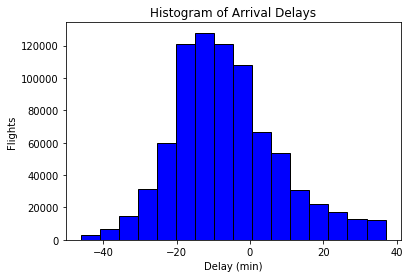

In [ ]:
plt.hist(flights7['Arrival Delay (Minutes)'], color = 'blue', edgecolor = 'black', bins = int((max_arrdel+min_arrdel*(-1))/5))
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [ ]:
flights6.shape

(891586, 43)

In [ ]:
flights7.shape

(809167, 43)

In [ ]:
flights7.columns

Index(['Arrival Delay (Minutes)', 'Taxi-In time (Minutes)',
       'destinationstate_0', 'destinationstate_1', 'destinationstate_2',
       'destinationlatitude', 'destinationlongitude', 'originstate_0',
       'originstate_1', 'originstate_2', 'originstate_3', 'originstate_4',
       'originstate_5', 'originstate_6', 'originlatitude', 'originlongitude',
       'Month', 'Day', 'Scheduled Arrival Hour', 'Scheduled Arrival Minute',
       'Weekdaynum', 'xa', 'ya', 'xs', 'ys', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'Weekdaynum_sin', 'Weekdaynum_cos',
       'Departure Delay (Minutes)', 'HS_Dist', 'Delayed?', 'Carrier Code_AA',
       'Carrier Code_DL', 'Carrier Code_OO', 'Carrier Code_UA',
       'Carrier Code_WN', 'Destination Airport_ATL', 'Destination Airport_DFW',
       'Destination Airport_LAX', 'Destination Airport_ORD'],
      dtype='object')

In [ ]:
flights7.describe()

,Arrival Delay (Minutes),Taxi-In time (Minutes),destinationstate_0,destinationstate_1,destinationstate_2,destinationlatitude,destinationlongitude,originstate_0,originstate_1,originstate_2,originstate_3,originstate_4,originstate_5,originstate_6,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes),HS_Dist,Delayed?,Carrier Code_AA,Carrier Code_DL,Carrier Code_OO,Carrier Code_UA,Carrier Code_WN,Destination Airport_ATL,Destination Airport_DFW,Destination Airport_LAX,Destination Airport_ORD
count,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.0,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,8.091670e+05,8.091670e+05,8.091670e+05,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000,809167.000000
mean,-6.311148,10.735925,0.241468,0.385317,0.575858,35.579300,-94.456257,0.0,0.129711,0.251896,0.362106,0.541468,0.471406,0.533009,36.408563,-93.565532,6.576514,15.799252,13.807993,29.342238,2.934763,-0.198718,-0.285390,-0.213031,-0.298704,-1.757380e-02,-1.703281e-02,-3.009786e-03,-0.023451,0.018836,0.130225,2.189649,0.045521,0.266422,0.288656,0.338851,0.146652,0.130558,0.095283,0.373215,0.182674,0.202643,0.241468
std,14.497575,6.478917,0.427974,0.486670,0.494212,3.626659,12.859901,0.0,0.335986,0.434102,0.480609,0.498278,0.499182,0.498910,5.584462,17.541920,3.405323,8.767044,4.971946,17.467314,1.994298,0.691320,0.633357,0.688883,0.625168,7.079335e-01,7.058558e-01,7.134228e-01,0.700336,0.649150,0.749195,22.859145,9.071817,0.442088,0.453138,0.473319,0.353759,0.336916,0.293606,0.483659,0.386399,0.401969,0.427974
min,-46.000000,0.000000,0.000000,0.000000,0.000000,32.895950,-118.408070,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.701890,-159.338960,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.866025,-1.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-16.000000,7.000000,0.000000,0.000000,0.000000,33.640440,-97.037200,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.895950,-104.700250,4.000000,8.000000,10.000000,14.000000,1.000000,-0.850352,-0.845728,-0.852640,-0.843391,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,-0.866025,-0.500000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.000000,9.000000,0.000000,0.000000,1.000000,33.640440,-87.904460,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,37.361860,-87.896580,7.000000,16.000000,14.000000,30.000000,3.000000,-0.390731,-0.480989,-0.430511,-0.500000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.000000,0.500000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,13.000000,0.000000,1.000000,1.000000,33.942540,-84.426940,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.692500,-80.290560,10.000000,23.000000,18.000000,45.000000,5.000000,0.484810,0.229200,0.465615,0.216440,5.000000e-01,5.000000e-01,7.247928e-01,0.688967,0.866025,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,37.000000,193.000000,1.000000,1.000000,1.000000,41.979600,-84.426940,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.813680,-64.798560,12.000000,31.000000,23.000000,59.000000,6.000000,1.000000,1.000000,1.000000,0.999990,1.000000e+00,1.000000e+00,9.987165e

In [ ]:
# flights7.to_csv('processedflights15july.csv',index=False)

In [ ]:
flights7 = pd.read_csv('processedflights15july.csv')

In [ ]:
flights7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809167 entries, 0 to 809166
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Arrival Delay (Minutes)    809167 non-null  float64
 1   Taxi-In time (Minutes)     809167 non-null  float64
 2   destinationstate_0         809167 non-null  int64  
 3   destinationstate_1         809167 non-null  int64  
 4   destinationstate_2         809167 non-null  int64  
 5   destinationlatitude        809167 non-null  float64
 6   destinationlongitude       809167 non-null  float64
 7   originstate_0              809167 non-null  int64  
 8   originstate_1              809167 non-null  int64  
 9   originstate_2              809167 non-null  int64  
 10  originstate_3              809167 non-null  int64  
 11  originstate_4              809167 non-null  int64  
 12  originstate_5              809167 non-null  int64  
 13  originstate_6              80

In [ ]:
flights7.head()

,Arrival Delay (Minutes),Taxi-In time (Minutes),destinationstate_0,destinationstate_1,destinationstate_2,destinationlatitude,destinationlongitude,originstate_0,originstate_1,originstate_2,originstate_3,originstate_4,originstate_5,originstate_6,originlatitude,originlongitude,Month,Day,Weekdaynum,xa,ya,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,Departure Delay (Minutes),HS_Dist,Delayed?,Carrier Code_AA,Carrier Code_DL,Carrier Code_OO,Carrier Code_UA,Carrier Code_WN,Destination Airport_ATL,Destination Airport_DFW,Destination Airport_LAX,Destination Airport_ORD
0,-17.0,7.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,0,0.342020,-0.939693,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,364,0,1,0,0,0,0,1,0,0,0
1,-7.0,12.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,0,-0.904455,0.426569,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,-3.0,1174,0,1,0,0,0,0,1,0,0,0
2,-18.0,6.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,1,33.43417,-112.00806,1,1,0,-0.991445,0.130526,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,1.0,2548,0,1,0,0,0,0,1,0,0,0
3,17.0,8.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,0,-0.998135,-0.061049,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,15.0,1174,1,1,0,0,0,0,1,0,0,0
4,-23.0,7.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,0,-0.713250,0.700909,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,-2.0,364,0,1,0,0,0,0,1,0,0,0


In [ ]:
cols = ["Taxi-In time (Minutes)", "xa", "ya", "Departure Delay (Minutes)"]
flights8 = flights7.drop(cols,axis=1)

In [ ]:
flights8.head()

,Arrival Delay (Minutes),destinationstate_0,destinationstate_1,destinationstate_2,destinationlatitude,destinationlongitude,originstate_0,originstate_1,originstate_2,originstate_3,originstate_4,originstate_5,originstate_6,originlatitude,originlongitude,Month,Day,Scheduled Arrival Hour,Scheduled Arrival Minute,Weekdaynum,xs,ys,Month_sin,Month_cos,Day_sin,Day_cos,Weekdaynum_sin,Weekdaynum_cos,HS_Dist,Delayed?,Carrier Code_AA,Carrier Code_DL,Carrier Code_OO,Carrier Code_UA,Carrier Code_WN,Destination Airport_ATL,Destination Airport_DFW,Destination Airport_LAX,Destination Airport_ORD
0,-17.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,10,57,0,0.271440,-0.962455,0.5,0.866025,0.201299,0.97953,0.0,1.0,364,0,1,0,0,0,0,1,0,0,0
1,-7.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,19,48,0,-0.891007,0.453990,0.5,0.866025,0.201299,0.97953,0.0,1.0,1174,0,1,0,0,0,0,1,0,0,0
2,-18.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,1,33.43417,-112.00806,1,1,18,48,0,-0.978148,0.207912,0.5,0.866025,0.201299,0.97953,0.0,1.0,2548,0,1,0,0,0,0,1,0,0,0
3,17.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,1,0,32.89595,-97.03720,1,1,17,29,0,-0.990866,-0.134851,0.5,0.866025,0.201299,0.97953,0.0,1.0,1174,1,1,0,0,0,0,1,0,0,0
4,-23.0,0,0,1,33.64044,-84.42694,0,0,0,0,0,0,1,35.21401,-80.94313,1,1,21,21,0,-0.639439,0.768842,0.5,0.866025,0.201299,0.97953,0.0,1.0,364,0,1,0,0,0,0,1,0,0,0


In [ ]:
flights8.to_csv('processedflights9august.csv',index=False)